## Decision Tree Exercises

### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

#### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [230]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

import acquire
import prepare

import warnings
warnings.filterwarnings("ignore")

In [231]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.shape, validate.shape, test.shape

((497, 15), (214, 15), (178, 15))

In [232]:
X_train, y_train = train.drop(columns='survived'), train.survived
X_validate, y_validate = validate.drop(columns='survived'), validate.survived
X_test, y_test = test.drop(columns='survived'), test.survived

In [233]:
X_train.head()

,passenger_id,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S,sex_male
583,583,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,1
337,337,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0
50,50,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,1
218,218,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0
31,31,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0


In [234]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 553
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  497 non-null    int64  
 1   pclass        497 non-null    int64  
 2   sex           497 non-null    object 
 3   age           497 non-null    float64
 4   sibsp         497 non-null    int64  
 5   parch         497 non-null    int64  
 6   fare          497 non-null    float64
 7   embarked      497 non-null    object 
 8   class         497 non-null    object 
 9   embark_town   497 non-null    object 
 10  alone         497 non-null    int64  
 11  embarked_Q    497 non-null    uint8  
 12  embarked_S    497 non-null    uint8  
 13  sex_male      497 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 48.0+ KB


In [235]:
# value counts for subset to create baseline
y_train.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [236]:
# baseline prediction = 0 (everyone dies)

# 1. Create the baseline with constant equal to highest value from y_train
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the baseline to the train subset
baseline.fit(X_train, y_train)
# 3. Accuracy of the baseline on the train subset
print(f'Baseline accuracy on the train subset: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy on the train subset: 0.6177


#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [342]:
X_cols = ['pclass', 'age', 'fare', 'sex_male']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [343]:
# 1. Create the decision tree
tree1 = DecisionTreeClassifier(max_depth=3, random_state=1234)
# 2. Fit the object
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [344]:
print(f'Model score for tree1 on train subset is: {tree1.score(X_train, y_train):.4}')
print(f'Model score for tree1 on validate subset is: {tree1.score(X_validate, y_validate):.4}')

Model score for tree1 on train subset is: 0.8189
Model score for tree1 on validate subset is: 0.7897


In [345]:
pd.DataFrame(confusion_matrix(y_train, tree1.predict(X_train)))

,0,1
0,279,28
1,62,128


In [346]:
pd.DataFrame(classification_report(y_train, tree1.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.818182,0.820513,0.818913,0.819347,0.819073
recall,0.908795,0.673684,0.818913,0.791239,0.818913
f1-score,0.861111,0.739884,0.818913,0.800498,0.814767
support,307.000000,190.000000,0.818913,497.000000,497.000000


#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [347]:
acc = accuracy_score(y_train, tree1.predict(X_train))
print(f'Accuracy score is: {acc:.4}')

count = len(X_train)

tp = 279
fp = 28
fn = 62
tn = 128

print(f'True Positive Rate is: {tp/count:.2%}')
print(f'False Positive Rate is: {fp/count:.2%}')
print(f'True Negative Rate is: {tn/count:.2%}')
print(f'False Negative Rate is: {fn/count:.2%}')

prec = precision_score(y_train, tree1.predict(X_train))
print(f'Precision score is: {prec:.4}')

recall = recall_score(y_train, tree1.predict(X_train))
print(f'Recall score is: {recall:.4}')

fscore = f1_score(y_train, tree1.predict(X_train))
print(f'F1-score score is: {fscore:.4}')

pre, rec, f1, supp = precision_recall_fscore_support(y_train, tree1.predict(X_train))
print(f'Support score is: {supp}')

Accuracy score is: 0.8189
True Positive Rate is: 56.14%
False Positive Rate is: 5.63%
True Negative Rate is: 25.75%
False Negative Rate is: 12.47%
Precision score is: 0.8205
Recall score is: 0.6737
F1-score score is: 0.7399
Support score is: [307 190]


In [348]:
pd.Series(dict(zip(X_train.columns, tree1.feature_importances_)))

pclass      0.242454
age         0.095586
fare        0.057635
sex_male    0.604325
dtype: float64

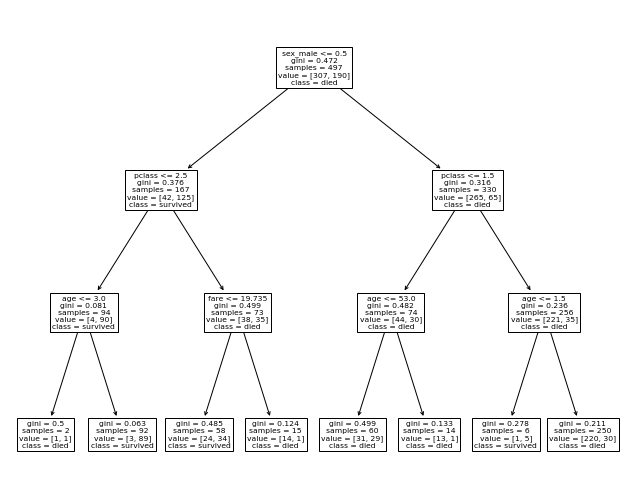

In [243]:
plot_tree(tree1, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])
plt.show()

#### 5. Run through steps 2-4 using a different max_depth value.

In [259]:
# 1. Create the decision tree
tree2 = DecisionTreeClassifier(max_depth=4, random_state=1234)
# 2. Fit the object
tree2.fit(X_train, y_train)
# 3. Accuracy score of the 
print(f'Model score for tree2 on train subset is: {tree2.score(X_train, y_train):.4}')
print(f'Model score for tree2 on validate subset is: {tree2.score(X_validate, y_validate):.4}')

Model score for tree2 on train subset is: 0.835
Model score for tree2 on validate subset is: 0.785


In [252]:
pd.DataFrame(confusion_matrix(y_train, tree2.predict(X_train)))

,0,1
0,301,6
1,76,114


In [253]:
pd.DataFrame(classification_report(y_train, tree2.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.798408,0.950000,0.83501,0.874204,0.856361
recall,0.980456,0.600000,0.83501,0.790228,0.835010
f1-score,0.880117,0.735484,0.83501,0.807800,0.824825
support,307.000000,190.000000,0.83501,497.000000,497.000000


In [254]:
acc2 = accuracy_score(y_train, tree2.predict(X_train))
print(f'Accuracy score is: {acc2:.4}')

count = len(X_train)

tp2 = 301
fp2 = 6
fn2 = 76
tn2 = 114

print(f'True Positive Rate is: {tp2/count:.2%}')
print(f'False Positive Rate is: {fp2/count:.2%}')
print(f'True Negative Rate is: {tn2/count:.2%}')
print(f'False Negative Rate is: {fn2/count:.2%}')

prec2 = precision_score(y_train, tree2.predict(X_train))
print(f'Precision score is: {prec2:.4}')

recall2 = recall_score(y_train, tree2.predict(X_train))
print(f'Recall score is: {recall2:.4}')

fscore2 = f1_score(y_train, tree2.predict(X_train))
print(f'F1-score score is: {fscore2:.4}')

pre2, rec2, f12, supp2 = precision_recall_fscore_support(y_train, tree2.predict(X_train))
print(f'Support score is: {supp2}')

Accuracy score is: 0.835
True Positive Rate is: 60.56%
False Positive Rate is: 1.21%
True Negative Rate is: 22.94%
False Negative Rate is: 15.29%
Precision score is: 0.95
Recall score is: 0.6
F1-score score is: 0.7355
Support score is: [307 190]


#### 6. Which model performs better on your in-sample data?

In [258]:
print(f'Model score for tree1 on train subset is: {tree1.score(X_train, y_train):.4}')
print(f'Model score for tree2 on train subset is: {tree2.score(X_train, y_train):.4}')

Model score for tree1 on train subset is: 0.8189
Model score for tree2 on train subset is: 0.835


#### 7. Which model performs best on your out-of-sample data, the validate set?

In [260]:
print(f'Model score for tree1 on validate subset is: {tree1.score(X_validate, y_validate):.4}')
print(f'Model score for tree2 on validate subset is: {tree2.score(X_validate, y_validate):.4}')

Model score for tree1 on validate subset is: 0.7897
Model score for tree2 on validate subset is: 0.785


In [173]:
# 1. Create the decision tree
tree4 = DecisionTreeClassifier(max_depth=2)
# 2. Fit the object
tree4.fit(X_train, y_train)
# 3. Accuracy score of the 
print(f'Train score: %.4f' % tree4.score(X_train, y_train))
print(f'Validate score: %.4f' % tree4.score(X_validate, y_validate))

Train score: 0.7907
Validate score: 0.7804


In [174]:
# 1. Create the decision tree
tree5 = DecisionTreeClassifier(max_leaf_nodes=6)
# 2. Fit the object
tree5.fit(X_train, y_train)
# 3. Accuracy score of the 
print(f'Train score: %.4f' % tree5.score(X_train, y_train))
print(f'Validate score: %.4f' % tree5.score(X_validate, y_validate))

Train score: 0.8189
Validate score: 0.7897


In [175]:
# 1. Create the decision tree
tree6 = DecisionTreeClassifier(max_leaf_nodes=8)
# 2. Fit the object
tree6.fit(X_train, y_train)
# 3. Accuracy score of the 
print(f'Train score: %.4f' % tree6.score(X_train, y_train))
print(f'Validate score: %.4f' % tree6.score(X_validate, y_validate))

Train score: 0.8189
Validate score: 0.7850


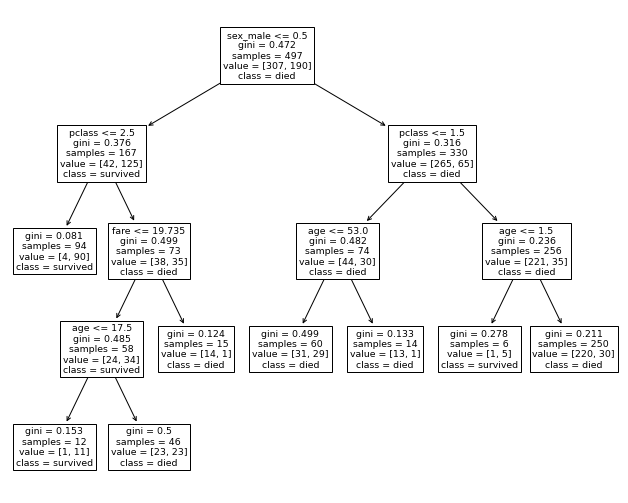

In [176]:
plot_tree(tree6, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])
plt.show()

In [177]:
pd.Series(dict(zip(X_train.columns, tree6.feature_importances_)))

pclass      0.237248
age         0.115004
fare        0.056398
sex_male    0.591350
dtype: float64

## Random Forest Exercises

### Continue working in your model file with titanic data to do the following:

#### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [261]:
rf1 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=1234)

rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1234)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [263]:
print(f'Model score for rf1 on train subset is: {rf1.score(X_train, y_train):.4}')
print(f'Model score for rf1 on validate subset is: {rf1.score(X_validate, y_validate):.4}')

Model score for rf1 on train subset is: 0.9638
Model score for rf1 on validate subset is: 0.8178


In [264]:
pd.DataFrame(confusion_matrix(y_train, rf1.predict(X_train)))

,0,1
0,305,2
1,16,174


In [265]:
pd.DataFrame(classification_report(y_train, rf1.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.950156,0.988636,0.963783,0.969396,0.964867
recall,0.993485,0.915789,0.963783,0.954637,0.963783
f1-score,0.971338,0.950820,0.963783,0.961079,0.963494
support,307.000000,190.000000,0.963783,497.000000,497.000000


#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [266]:
rf_acc = accuracy_score(y_train, rf1.predict(X_train))
print(f'Accuracy score is: {rf_acc:.4}')

count = len(X_train)

tp = 305
fp = 2
fn = 16
tn = 174

print(f'True Positive Rate is: {tp/count:.2%}')
print(f'False Positive Rate is: {fp/count:.2%}')
print(f'True Negative Rate is: {tn/count:.2%}')
print(f'False Negative Rate is: {fn/count:.2%}')

rf_prec = precision_score(y_train, rf1.predict(X_train))
print(f'Precision score is: {rf_prec:.4}')

rf_recall = recall_score(y_train, rf1.predict(X_train))
print(f'Recall score is: {rf_recall:.4}')

rf_fscore = f1_score(y_train, rf1.predict(X_train))
print(f'F1-score score is: {rf_fscore:.4}')

rf_pre, rf_rec, rf_f1, rf_supp = precision_recall_fscore_support(y_train, rf1.predict(X_train))
print(f'Support score is: {rf_supp}')

Accuracy score is: 0.9638
True Positive Rate is: 61.37%
False Positive Rate is: 0.40%
True Negative Rate is: 35.01%
False Negative Rate is: 3.22%
Precision score is: 0.9886
Recall score is: 0.9158
F1-score score is: 0.9508
Support score is: [307 190]


In [268]:
pd.Series(dict(zip(X_train.columns, rf1.feature_importances_)))

pclass      0.119495
age         0.253016
fare        0.340223
sex_male    0.287266
dtype: float64

#### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [285]:
rf2 = RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=1234)

rf2.fit(X_train, y_train)

print(f'Model score for rf2 on train subset is: {rf2.score(X_train, y_train):.4}')
print(f'Model score for rf2 on validate subset is: {rf2.score(X_validate, y_validate):.4}')

Model score for rf2 on train subset is: 0.8813
Model score for rf2 on validate subset is: 0.8084


In [275]:
pd.DataFrame(confusion_matrix(y_train, rf2.predict(X_train)))

,0,1
0,294,13
1,46,144


In [276]:
pd.DataFrame(classification_report(y_train, rf2.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.864706,0.917197,0.881288,0.890952,0.884773
recall,0.957655,0.757895,0.881288,0.857775,0.881288
f1-score,0.908810,0.829971,0.881288,0.869391,0.878670
support,307.000000,190.000000,0.881288,497.000000,497.000000


In [282]:
rf2_acc = accuracy_score(y_train, rf2.predict(X_train))
print(f'Accuracy score is: {rf2_acc:.4}')

count = len(X_train)

tp2 = 294
fp2 = 13
fn2 = 46
tn2 = 144

print(f'True Positive Rate is: {tp2/count:.2%}')
print(f'False Positive Rate is: {fp2/count:.2%}')
print(f'True Negative Rate is: {tn2/count:.2%}')
print(f'False Negative Rate is: {fn2/count:.2%}')

rf2_prec = precision_score(y_train, rf2.predict(X_train))
print(f'Precision score is: {rf2_prec:.4}')

rf2_recall = recall_score(y_train, rf2.predict(X_train))
print(f'Recall score is: {rf2_recall:.4}')

rf2_fscore = f1_score(y_train, rf2.predict(X_train))
print(f'F1-score score is: {rf2_fscore:.4}')

rf2_pre, rf2_rec, rf2_f1, rf2_supp = precision_recall_fscore_support(y_train, rf2.predict(X_train))
print(f'Support score is: {rf2_supp}')

Accuracy score is: 0.8813
True Positive Rate is: 59.15%
False Positive Rate is: 2.62%
True Negative Rate is: 28.97%
False Negative Rate is: 9.26%
Precision score is: 0.9172
Recall score is: 0.7579
F1-score score is: 0.83
Support score is: [307 190]


In [229]:
pd.Series(dict(zip(X_train.columns, rf2.feature_importances_)))

pclass      0.161692
age         0.125291
fare        0.242090
sex_male    0.470927
dtype: float64

In [286]:
rf3 = RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=1234)

rf3.fit(X_train, y_train)

print(f'Model score for rf3 on train subset is: {rf3.score(X_train, y_train):.4}')
print(f'Model score for rf3 on validate subset is: {rf3.score(X_validate, y_validate):.4}')

Model score for rf3 on train subset is: 0.831
Model score for rf3 on validate subset is: 0.7991


In [280]:
pd.DataFrame(confusion_matrix(y_train, rf3.predict(X_train)))

,0,1
0,296,11
1,73,117


In [281]:
pd.DataFrame(classification_report(y_train, rf3.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.802168,0.914062,0.830986,0.858115,0.844945
recall,0.964169,0.615789,0.830986,0.789979,0.830986
f1-score,0.875740,0.735849,0.830986,0.805794,0.822260
support,307.000000,190.000000,0.830986,497.000000,497.000000


In [283]:
rf3_acc = accuracy_score(y_train, rf3.predict(X_train))
print(f'Accuracy score is: {rf3_acc:.4}')

count = len(X_train)

tp3 = 294
fp3 = 13
fn3 = 46
tn3 = 144

print(f'True Positive Rate is: {tp3/count:.2%}')
print(f'False Positive Rate is: {fp3/count:.2%}')
print(f'True Negative Rate is: {tn3/count:.2%}')
print(f'False Negative Rate is: {fn3/count:.2%}')

rf3_prec = precision_score(y_train, rf3.predict(X_train))
print(f'Precision score is: {rf3_prec:.4}')

rf3_recall = recall_score(y_train, rf3.predict(X_train))
print(f'Recall score is: {rf3_recall:.4}')

rf3_fscore = f1_score(y_train, rf3.predict(X_train))
print(f'F1-score score is: {rf3_fscore:.4}')

rf3_pre, rf3_rec, rf3_f1, rf3_supp = precision_recall_fscore_support(y_train, rf3.predict(X_train))
print(f'Support score is: {rf3_supp}')

Accuracy score is: 0.831
True Positive Rate is: 59.15%
False Positive Rate is: 2.62%
True Negative Rate is: 28.97%
False Negative Rate is: 9.26%
Precision score is: 0.9141
Recall score is: 0.6158
F1-score score is: 0.7358
Support score is: [307 190]


#### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

-- the difference in evaluation metrics was increasing min_samples_leaf while decreasing max_depth, done by increments of 5

-- rf1 - max_depth=10, min_samples_leaf=1 = rf1 on train subset is: 0.9638

-- rf2 - max_depth=10, min_samples_leaf=5 = train subset is: 0.8813

-- rf3 - max_depth=5, min_samples_leaf=10 = train subset is: 0.831

-- rf1 performed the best on the in-sample data because it allowed for more branches and and resolved to a single leaf


#### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

-- rf1 - max_depth=10, min_samples_leaf=1 = rf1 on train subset is: 0.9638, validate subset is: 0.8178

-- rf2 - max_depth=10, min_samples_leaf=5 = train subset is: 0.8813, validate subset is: 0.8084

-- rf3 - max_depth=5, min_samples_leaf=10 = train subset is: 0.831, validate subset is: 0.7991

-- rf3 had the best performance on both train and validate subsets

## KNN Exercises

### Continue working in your model file with the titanic dataset.

#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [288]:
from sklearn.neighbors import KNeighborsClassifier

In [349]:
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')

knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [350]:
y_pred_knn1 = knn1.predict(X_train)

In [351]:
y_pred_proba_knn1 = knn1.predict_proba(X_train)

In [352]:
print(f'Model score for knn1 on train subset is: {knn1.score(X_train, y_train):.4}')
print(f'Model score for knn1 on validate subset is: {knn1.score(X_validate, y_validate):.4}')

Model score for knn1 on train subset is: 0.9879
Model score for knn1 on validate subset is: 0.7103


In [353]:
print(confusion_matrix(y_train, y_pred_knn1))

[[304   3]
 [  3 187]]


In [354]:
print(classification_report(y_train, y_pred_knn1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       307
           1       0.98      0.98      0.98       190

    accuracy                           0.99       497
   macro avg       0.99      0.99      0.99       497
weighted avg       0.99      0.99      0.99       497



In [355]:
knn1_acc = accuracy_score(y_train, knn1.predict(X_train))
print(f'Accuracy score is: {knn1_acc:.4}')

count = len(X_train)

tp_knn1 = 304
fp_knn1 = 3
fn_knn1 = 3
tn_knn1 = 187

print(f'True Positive Rate is: {tp_knn1/count:.2%}')
print(f'False Positive Rate is: {fp_knn1/count:.2%}')
print(f'True Negative Rate is: {tn_knn1/count:.2%}')
print(f'False Negative Rate is: {fn_knn1/count:.2%}')

knn1_prec = precision_score(y_train, knn1.predict(X_train))
print(f'Precision score is: {knn1_prec:.4}')

knn1_recall = recall_score(y_train, knn1.predict(X_train))
print(f'Recall score is: {knn1_recall:.4}')

knn1_fscore = f1_score(y_train, knn1.predict(X_train))
print(f'F1-score score is: {knn1_fscore:.4}')

knn1_pre, knn1_rec, knn1_f1, knn1_supp = precision_recall_fscore_support(y_train, knn1.predict(X_train))
print(f'Support score is: {knn1_supp}')

Accuracy score is: 0.9879
True Positive Rate is: 61.17%
False Positive Rate is: 0.60%
True Negative Rate is: 37.63%
False Negative Rate is: 0.60%
Precision score is: 0.9842
Recall score is: 0.9842
F1-score score is: 0.9842
Support score is: [307 190]


#### 4. Run through steps 2-4 setting k to 10

In [356]:
knn2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [357]:
y_pred_knn2 = knn2.predict(X_train)

In [358]:
y_pred_proba_knn2 = knn2.predict_proba(X_train)

In [360]:
print(f'Model score for knn1on train subset is: {knn2.score(X_train, y_train):.4}')
print(f'Model score for knn1 on validate subset is: {knn2.score(X_validate, y_validate):.4}')

Model score for knn1on train subset is: 0.7565
Model score for knn1 on validate subset is: 0.6869


In [361]:
print(confusion_matrix(y_train, y_pred_knn2))

[[278  29]
 [ 92  98]]


In [362]:
print(classification_report(y_train, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       307
           1       0.77      0.52      0.62       190

    accuracy                           0.76       497
   macro avg       0.76      0.71      0.72       497
weighted avg       0.76      0.76      0.74       497



In [363]:
knn2_acc = accuracy_score(y_train, knn2.predict(X_train))
print(f'Accuracy score is: {knn2_acc:.4}')

count = len(X_train)

tp_knn2 = 278
fp_knn2 = 29
fn_knn2 = 92
tn_knn2 = 98

print(f'True Positive Rate is: {tp_knn2/count:.2%}')
print(f'False Positive Rate is: {fp_knn2/count:.2%}')
print(f'True Negative Rate is: {tn_knn2/count:.2%}')
print(f'False Negative Rate is: {fn_knn2/count:.2%}')

knn2_prec = precision_score(y_train, knn2.predict(X_train))
print(f'Precision score is: {knn2_prec:.4}')

knn2_recall = recall_score(y_train, knn2.predict(X_train))
print(f'Recall score is: {knn2_recall:.4}')

knn2_fscore = f1_score(y_train, knn2.predict(X_train))
print(f'F1-score score is: {knn2_fscore:.4}')

knn2_pre, knn2_rec, knn2_f1, knn2_supp = precision_recall_fscore_support(y_train, knn2.predict(X_train))
print(f'Support score is: {knn2_supp}')

Accuracy score is: 0.7565
True Positive Rate is: 55.94%
False Positive Rate is: 5.84%
True Negative Rate is: 19.72%
False Negative Rate is: 18.51%
Precision score is: 0.7717
Recall score is: 0.5158
F1-score score is: 0.6183
Support score is: [307 190]


#### 5. Run through setps 2-4 setting k to 20

In [316]:
knn3 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [317]:
y_pred_knn3 = knn3.predict(X_train)

In [318]:
y_pred_proba_knn3 = knn3.predict_proba(X_train)

In [365]:
print(f'Model score for knn1 on train subset is: {knn3.score(X_train, y_train):.4}')
print(f'Model score for knn1 on validate subset is: {knn3.score(X_validate, y_validate):.4}')

Model score for knn1on train subset is: 0.7183
Model score for knn1 on validate subset is: 0.7056


In [366]:
print(confusion_matrix(y_train, y_pred_knn3))

[[281  26]
 [114  76]]


In [367]:
print(classification_report(y_train, y_pred_knn3))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       307
           1       0.75      0.40      0.52       190

    accuracy                           0.72       497
   macro avg       0.73      0.66      0.66       497
weighted avg       0.72      0.72      0.69       497



In [368]:
knn3_acc = accuracy_score(y_train, knn3.predict(X_train))
print(f'Accuracy score is: {knn3_acc:.4}')

count = len(X_train)

tp_knn3 = 281
fp_knn3 = 26
fn_knn3 = 114
tn_knn3 = 76

print(f'True Positive Rate is: {tp_knn3/count:.2%}')
print(f'False Positive Rate is: {fp_knn3/count:.2%}')
print(f'True Negative Rate is: {tn_knn3/count:.2%}')
print(f'False Negative Rate is: {fn_knn3/count:.2%}')

knn3_prec = precision_score(y_train, knn3.predict(X_train))
print(f'Precision score is: {knn3_prec:.4}')

knn3_recall = recall_score(y_train, knn3.predict(X_train))
print(f'Recall score is: {knn3_recall:.4}')

knn3_fscore = f1_score(y_train, knn3.predict(X_train))
print(f'F1-score score is: {knn3_fscore:.4}')

knn3_pre, knn3_rec, knn3_f1, knn3_supp = precision_recall_fscore_support(y_train, knn3.predict(X_train))
print(f'Support score is: {knn3_supp}')

Accuracy score is: 0.7183
True Positive Rate is: 56.54%
False Positive Rate is: 5.23%
True Negative Rate is: 15.29%
False Negative Rate is: 22.94%
Precision score is: 0.7451
Recall score is: 0.4
F1-score score is: 0.5205
Support score is: [307 190]


In [ ]:
# X_cols = ['pclass', 'age', 'fare', 'sex_male']
# y_col = 'survived'

In [371]:
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_train, y_train)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 98.79%
 2: 82.90%
 3: 85.11%
 4: 79.07%
 5: 77.87%
 6: 76.46%
 7: 75.86%
 8: 74.65%
 9: 75.05%
10: 75.65%
11: 74.65%
12: 73.84%


In [372]:
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_validate, y_validate)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 71.03%
 2: 66.36%
 3: 71.03%
 4: 68.69%
 5: 72.43%
 6: 68.69%
 7: 70.09%
 8: 69.16%
 9: 70.09%
10: 68.69%
11: 71.50%
12: 67.76%


In [384]:
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_validate, y_validate)
    print(f'Model: {k} when k is {k}')
    print(f'training score: {knn.score(X_train, y_train):.2%}')
    print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
    print('__________________________________________________________')

Model: 1 when k is 1
training score: 98.79%
validate score: 71.03%
__________________________________________________________
Model: 2 when k is 2
training score: 82.90%
validate score: 66.36%
__________________________________________________________
Model: 3 when k is 3
training score: 85.11%
validate score: 71.03%
__________________________________________________________
Model: 4 when k is 4
training score: 79.07%
validate score: 68.69%
__________________________________________________________
Model: 5 when k is 5
training score: 77.87%
validate score: 72.43%
__________________________________________________________
Model: 6 when k is 6
training score: 76.46%
validate score: 68.69%
__________________________________________________________
Model: 7 when k is 7
training score: 75.86%
validate score: 70.09%
__________________________________________________________
Model: 8 when k is 8
training score: 74.65%
validate score: 69.16%
___________________________________________________

In [381]:
def metrics1(model):
    
    print(f'Model score for {model} on train subset is: {model.score(X_train, y_train):.4}')
    print(f'Model score for {model} on validate subset is: {model.score(X_validate, y_validate):.4}')
    
    
    
    matrix = confusion_matrix(df.survived, model.predict(X))
    
    tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
    fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
    tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])
    
    print(f'True Positive Rate is: {tpr/count:.2%}')
    print(f'False Positive Rate is: {fpr/count:.2%}')
    print(f'True Negative Rate is: {tnr/count:.2%}')
    print(f'False Negative Rate is: {fnr/count:.2%}')

In [382]:
metrics1(knn1)

Model score for KNeighborsClassifier(n_neighbors=1) on train subset is: 0.9879
Model score for KNeighborsClassifier(n_neighbors=1) on validate subset is: 0.7103


NameError: name 'df' is not defined

In [195]:
def run_metrics(model, data_set):
    """
    This function takes in a model and ouputs metrics. 
    model = name of class model
    data_set = train, validate, test (AS A STRING)
    Will output the Precision Score, the classification report, and the confusion matrix
    It is advisable to print the name of the model you're working with before hand for clarity
    i.e. print('Metrics for Model 1 with Train data\n')
    """
    if data_set == 'train':
        
        X = X_train
        y = y_train
        df = train
    
    if data_set == 'validate':
        X = X_validate
        y = y_validate
        df = validate
    
    if data_set == 'test':
        X = X_test
        y = y_test
        df = test
    
    score = model.score(X, y)
    
    matrix = confusion_matrix(df.survived, model.predict(X))
    
    tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
    fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
    tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])
    print(f'{data_set} data set accuracy score: {score:.2%}')
    class_report = classification_report(df.survived, model.predict(X), zero_division=True)
    print('-------------------------------')
    print(f'classification report')
    print(class_report)
    print ('-------------------------------')
    print('')
    print('confusion matrix')
    print(matrix)
    print(' ')
    print(f'{data_set} data set model metrics')
    print('---------------------------------')
    print(f'True positive rate for the model is {tpr:.2%}')
    print(f'False positive rate for the model is  {fpr:.2%}')
    print(f'True negative rate for the model is {tnr:.2%}')
    print(f'False negative rate for the model is {fnr:.2%}')

In [122]:
print('Metrics for Model 1 with Train data\n')
run_metrics(rf1, 'train')

Metrics for Model 1 with Train data

train data set accuracy score: 91.15%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       307
           1       0.93      0.83      0.88       190

    accuracy                           0.91       497
   macro avg       0.92      0.90      0.90       497
weighted avg       0.91      0.91      0.91       497

-------------------------------

confusion matrix
[[296  11]
 [ 33 157]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 82.63%
False positive rate for the model is  3.58%
True negative rate for the model is 96.42%
False negative rate for the model is 17.37%


In [130]:
print('Metrics for Model 1 with Train data\n')
run_metrics(rf1, 'validate')

Metrics for Model 1 with Train data

validate data set accuracy score: 81.31%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       132
           1       0.77      0.73      0.75        82

    accuracy                           0.81       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214

-------------------------------

confusion matrix
[[114  18]
 [ 22  60]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 73.17%
False positive rate for the model is  13.64%
True negative rate for the model is 86.36%
False negative rate for the model is 26.83%
